In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!cp /content/gdrive/MyDrive/Datasets/titanic.zip /content

In [7]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: titanic_modified_dataset.csv  


In [10]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

In [2]:
def loss_function(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

In [3]:
def predict(x, theta):    
    z = np.dot(x, theta)
    y_hat = sigmoid_function(z)
    
    return y_hat

**SGD**

In [8]:
dataset_path = '/content/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

dataset = df.to_numpy().astype(np.float64)

idx = np.arange(dataset.shape[0])
np.random.shuffle(idx)

dataset = dataset[idx]

X, y = dataset[:, :-1], dataset[:, -1]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((X, intercept), axis=1)

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
TRAIN_SAMPLES = int(TRAIN_SIZE * dataset.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * dataset.shape[0])

X_train, y_train = X_b[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X_b[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X_b[VAL_SAMPLES:], y[VAL_SAMPLES:]

LR = 0.0001
N_ITERS = 100
theta = np.random.uniform(size=X_train.shape[1])

training_accuracies = []
training_losses = []
val_accuracies = []
val_losses = []

for epoch in range(N_ITERS):
  for i in range(0, X_train.shape[0]):
    xi = X_train[i:i+1]
    yi = y_train[i:i+1]

    
    y_hat = predict(xi, theta)

   
    training_loss = loss_function(y_hat, yi)

    
    gradient = np.dot(xi.T, (y_hat - yi))

    
    theta = theta - LR * gradient  

   
    training_losses.append(training_loss) 

    y_hat = predict(X_train, theta).round()
    training_acc = (y_hat == y_train).mean()
    training_accuracies.append(training_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = loss_function(y_val_hat, y_val)
    val_losses.append(val_loss) 

    y_val_hat = y_val_hat.round()
    val_acc = (y_val_hat == y_val).mean()
    val_accuracies.append(val_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


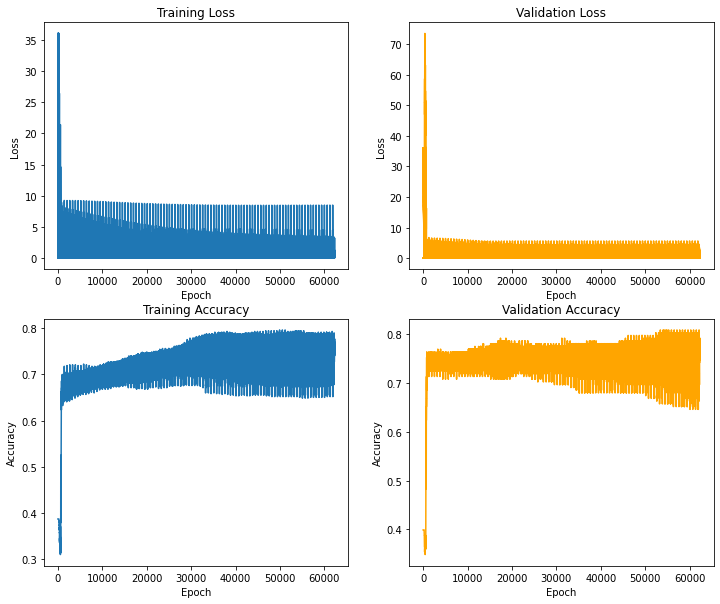

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(training_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(training_accuracies)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracies, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

**Mini batch size**

In [12]:
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

dataset = df.to_numpy().astype(np.float64)

idx = np.arange(dataset.shape[0])
np.random.shuffle(idx)

dataset = dataset[idx]

X, y = dataset[:, :-1], dataset[:, -1]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((X, intercept), axis=1)

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
TRAIN_SAMPLES = int(TRAIN_SIZE * dataset.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * dataset.shape[0])

X_train, y_train = X_b[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X_b[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X_b[VAL_SAMPLES:], y[VAL_SAMPLES:]

LR = 0.001
N_ITERS = 100
BATCH_SIZE = 32

theta = np.random.uniform(size=X_train.shape[1])
training_accuracies = []
training_losses = []
val_accuracies = []
val_losses = []

for epoch in range(N_ITERS):
  print(f"\nEPOCH {epoch + 1}")
  for i in range(0, X_train.shape[0], BATCH_SIZE):
    X_batch = X_train[i:i+BATCH_SIZE+1]
    y_batch = y_train[i:i+BATCH_SIZE+1]

    
    y_batch_hat = predict(X_batch, theta)

    
    training_loss = loss_function(y_batch_hat, y_batch)

    
    gradient = compute_gradient(X_batch, y_batch, y_batch_hat)

    
    theta = theta - LR * gradient  

    
    training_losses.append(training_loss) 
    print('\n', '=' * 10, '\n')
    print(f'train loss: {training_loss} \t')  
    y_hat = predict(X_train, theta).round()
    training_acc = (y_hat == y_train).mean()
    training_accuracies.append(training_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = loss_function(y_val_hat, y_val)
    val_losses.append(val_loss) 

    y_val_hat = y_val_hat.round()
    val_acc = (y_val_hat == y_val).mean()
    val_accuracies.append(val_acc)


EPOCH 1


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: inf 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: inf 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: 4.994984353793746 	

EPOCH 2


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: nan 	


train loss: 6.119912148759307 	


train loss: nan 	


train loss: nan 	


train loss: inf 	


train loss: 4.8877314029901795 	


train loss: 4.099193579388141 	


train loss: 3.8428649418276484 	


train loss: 3.236813131031658 	


train loss: 3.991042616864716 	


train loss: 1.2581148995909015 	


train loss: 1.881452954331327 	


train loss: 1.1313590260215909 	


train loss: 0.9493062355318269 	


train loss: 1.1700677038290233 	


train loss: 0.777506919626

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.


train loss: 0.6937391677526608 	


train loss: 0.7138922110908492 	


train loss: 0.7978710985219662 	


train loss: 0.7528705421179406 	


train loss: 0.5531119229772218 	


train loss: 0.3729828539089258 	


train loss: 0.5517085849362132 	


train loss: 0.6407987154086869 	


train loss: 0.7682337892774043 	


train loss: 0.9338630804393547 	


train loss: 0.5637309161591078 	


train loss: 0.7213956951527901 	


train loss: 0.624423357285757 	


train loss: 0.6577938504671449 	


train loss: 0.4858142059370004 	


train loss: 0.5870764516060989 	


train loss: 0.7344963204970911 	


train loss: 0.5049891812353476 	


train loss: 0.8860658023106833 	


train loss: 0.751372093408347 	

EPOCH 41


train loss: 0.6911684818740587 	


train loss: 0.7108787085507764 	


train loss: 0.7955172797053507 	


train loss: 0.751497222925612 	


train loss: 0.5518369735552511 	


train loss: 0.3723455955532516 	


train loss: 0.5506002525935482

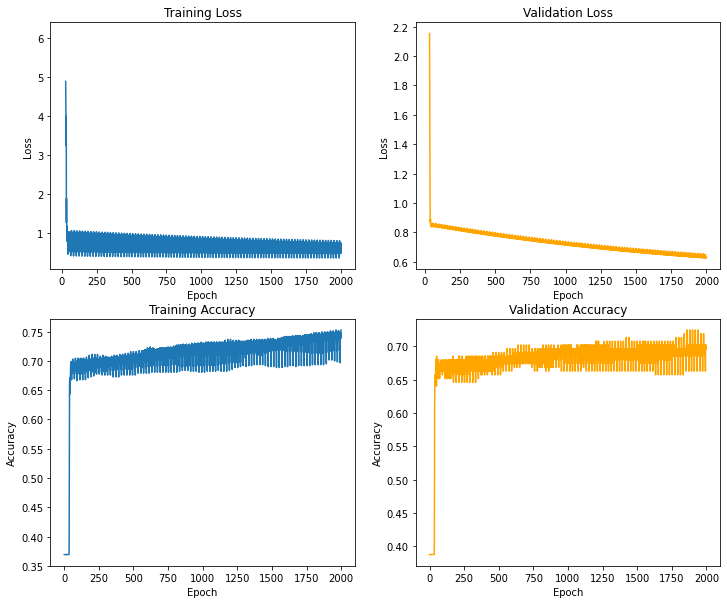

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(training_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(training_accuracies)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracies, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

**Batch Size**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size


dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

dataset = df.to_numpy().astype(np.float64)

idx = np.arange(dataset.shape[0])
np.random.shuffle(idx)

dataset = dataset[idx]

X, y = dataset[:, :-1], dataset[:, -1]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((X, intercept), axis=1)

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
TRAIN_SAMPLES = int(TRAIN_SIZE * dataset.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * dataset.shape[0])

X_train, y_train = X_b[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X_b[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X_b[VAL_SAMPLES:], y[VAL_SAMPLES:]

LR = 0.001
N_ITERS = 100

theta = np.random.uniform(size=X_train.shape[1])
training_losses = []
val_losses = []
training_accuracies = []
val_accuracies = []

for epoch in range(N_ITERS):
  print(f"\nEPOCH {epoch + 1}")
  X_batch = X_train
  y_batch = y_train

  
  y_batch_hat = predict(X_batch, theta)

  training_loss = loss_function(y_batch_hat, y_batch)

  
  gradient = compute_gradient(X_batch, y_batch, y_batch_hat)

 
  theta = theta - LR * gradient  

  
  training_losses.append(training_loss) 
  y_hat = predict(X_train, theta).round()

  training_acc = (y_hat == y_train).mean()
  training_accuracies.append(training_acc)
  print('\n', '=' * 10, '\n')
  print(f'train loss: {training_loss} \t')  

  y_val_hat = predict(X_val, theta)
  val_loss = loss_function(y_val_hat, y_val)
  val_losses.append(val_loss)

  y_val_hat = y_val_hat.round()
  val_acc = (y_val_hat == y_val).mean()
  val_accuracies.append(val_acc)
  print(f'val accuracy: {val_acc} \t')  


EPOCH 1


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 2


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 3


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 4


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 5


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 6


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 7


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 8


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 9


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 10


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 11


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 12


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 13


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 14


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 15


train loss: nan 	
val accuracy: 0.38764044943820225 	

EPOCH 16


train l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()




train loss: 0.7546757603429011 	
val accuracy: 0.6460674157303371 	

EPOCH 48


train loss: 0.7525246012147567 	
val accuracy: 0.6460674157303371 	

EPOCH 49


train loss: 0.7507925890662873 	
val accuracy: 0.6741573033707865 	

EPOCH 50


train loss: 0.7493857154779713 	
val accuracy: 0.6741573033707865 	

EPOCH 51


train loss: 0.748232569112881 	
val accuracy: 0.6685393258426966 	

EPOCH 52


train loss: 0.7472785787780531 	
val accuracy: 0.6685393258426966 	

EPOCH 53


train loss: 0.7464817826495128 	
val accuracy: 0.6685393258426966 	

EPOCH 54


train loss: 0.7458097131049564 	
val accuracy: 0.6685393258426966 	

EPOCH 55


train loss: 0.7452370946626039 	
val accuracy: 0.6741573033707865 	

EPOCH 56


train loss: 0.7447441346412188 	
val accuracy: 0.6741573033707865 	

EPOCH 57


train loss: 0.7443152468545902 	
val accuracy: 0.6741573033707865 	

EPOCH 58


train loss: 0.7439380928466267 	
val accuracy: 0.6741573033707865 	

EPOCH 59


train loss: 0.7436028570836769 	
val ac

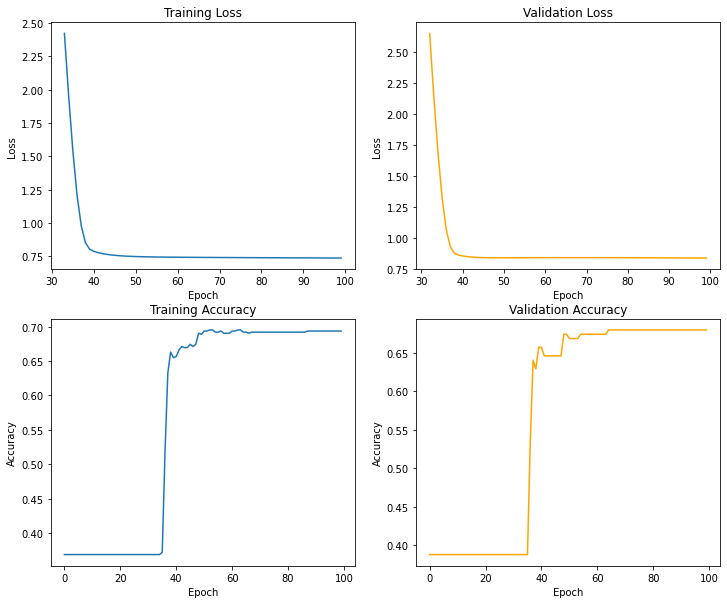

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(training_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(training_accuracies)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracies, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()